## Task: The purpose of this project is to predict and analyze the USA housing sales prices.
   

In [1]:
#Import all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df=pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Know your Data

In [3]:
df.shape

(1460, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Exploratory Data Analysis

In [5]:
## Missing Vlues

df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
features_with_na=[features for features in df.columns if df[features].isna().sum()!=0]  # if not 0 means there is missing values
features_with_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

-----These are the columns having null values-----

In [8]:
#Now, check the % of missing values in these features.

for missing_feature in features_with_na:

    print(missing_feature,":",np.round(df[missing_feature].isnull().sum()/ len(df[missing_feature])* 100,2),"%") # round upto 2 decimal point

LotFrontage : 17.74 %
Alley : 93.77 %
MasVnrType : 0.55 %
MasVnrArea : 0.55 %
BsmtQual : 2.53 %
BsmtCond : 2.53 %
BsmtExposure : 2.6 %
BsmtFinType1 : 2.53 %
BsmtFinType2 : 2.6 %
Electrical : 0.07 %
FireplaceQu : 47.26 %
GarageType : 5.55 %
GarageYrBlt : 5.55 %
GarageFinish : 5.55 %
GarageQual : 5.55 %
GarageCond : 5.55 %
PoolQC : 99.52 %
Fence : 80.75 %
MiscFeature : 96.3 %


In [9]:
# for x in features_with_na:
 #   print(x,":",np.round(df[x].isnull().sum()/ len(df[x])* 100,2),"%")  we can put any keyword in for loop for extracting name from a list.

we see some features are very high in % missing values.. will deal with it in data preprocessing step.

In [10]:
## Impact of missing values on SalePrice/Target variable.

Now we will check how much median value of Target variable/sales price is affected by missing value.
By grouping the data by the binary (1 & 0) and calculating the median SalePrice for each group (i.e., where the feature
is missing and where it is not), we will understand the impact of missing values on the target variable.

In [11]:
df1=df.copy()
df1     

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


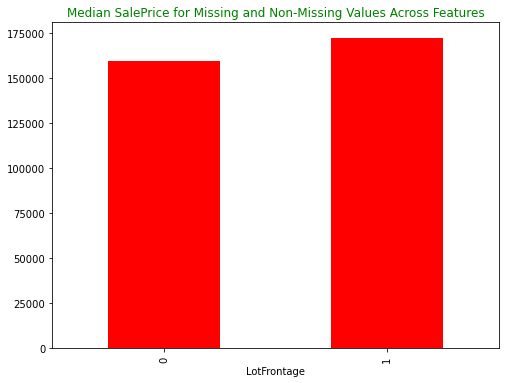

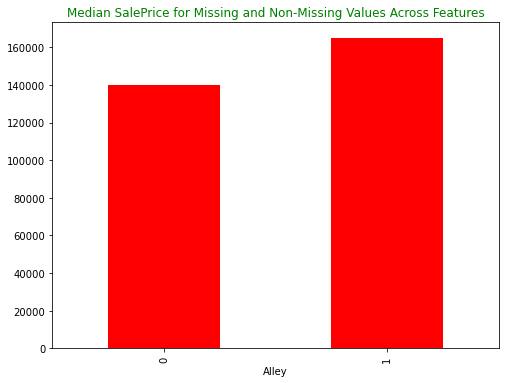

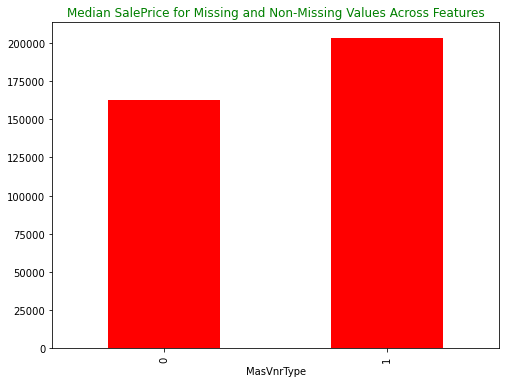

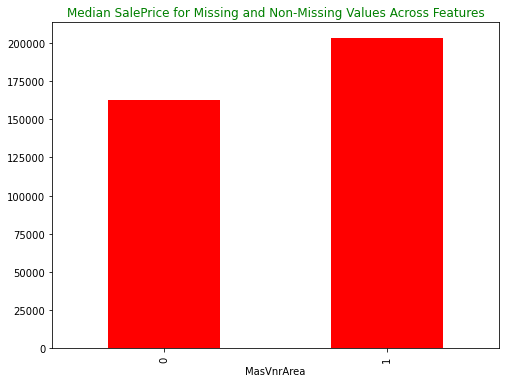

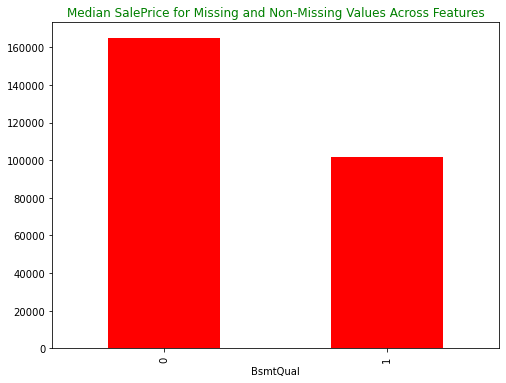

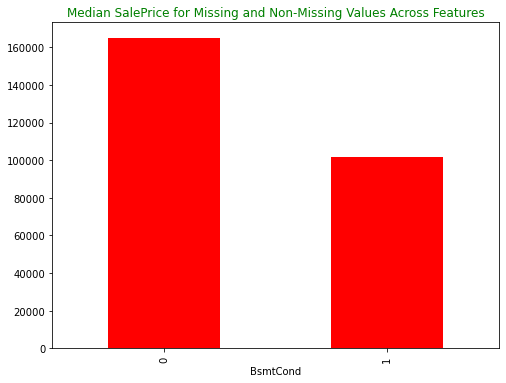

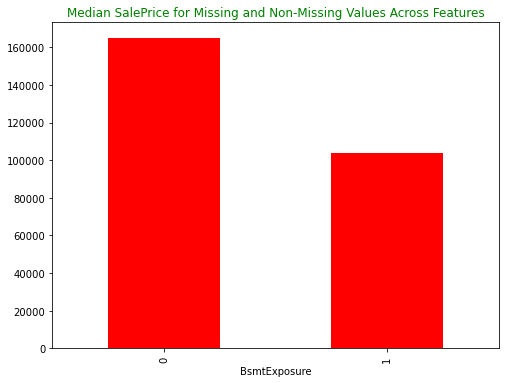

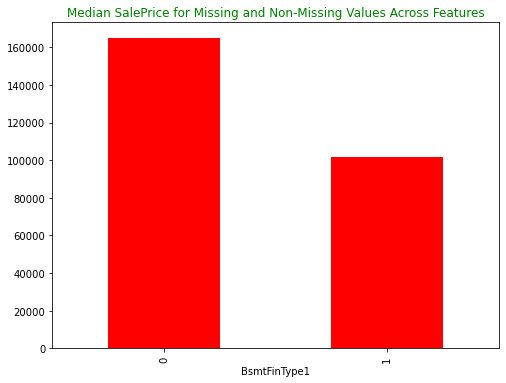

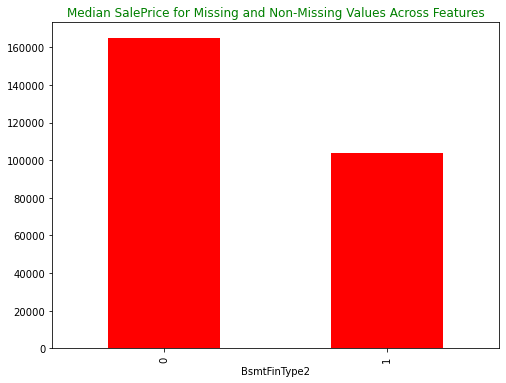

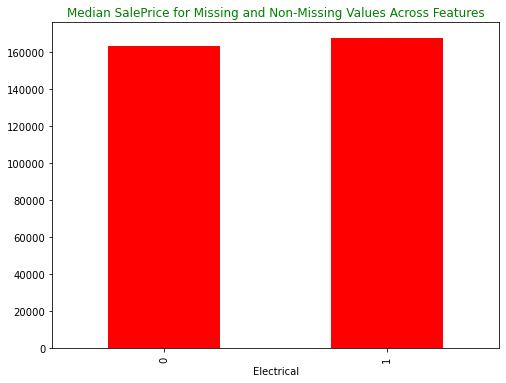

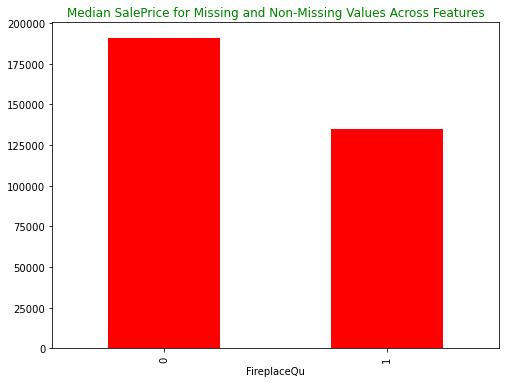

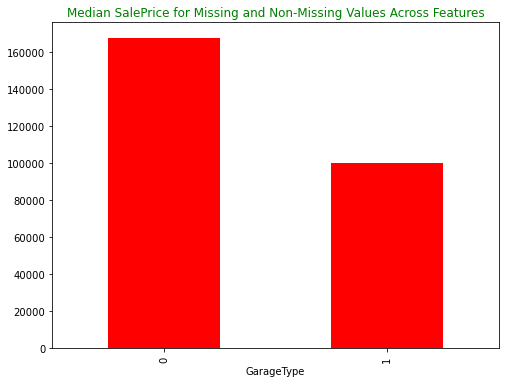

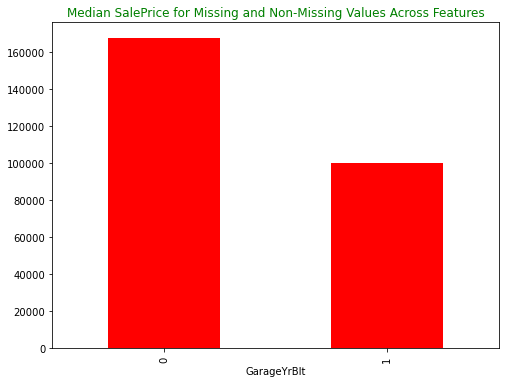

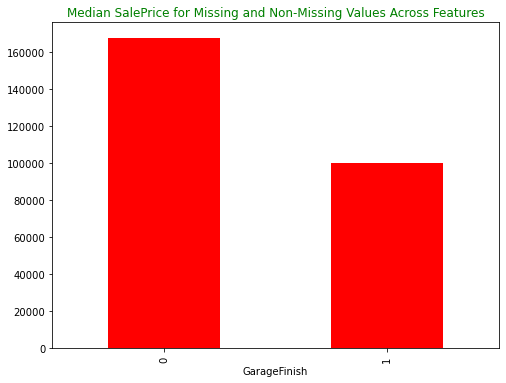

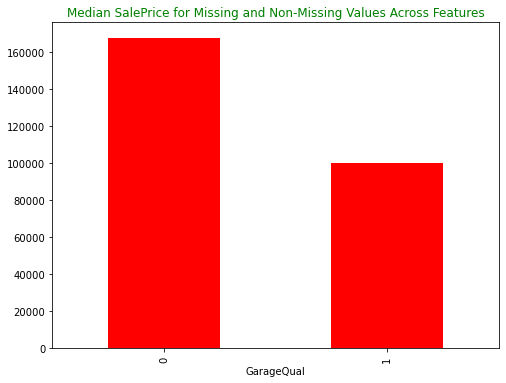

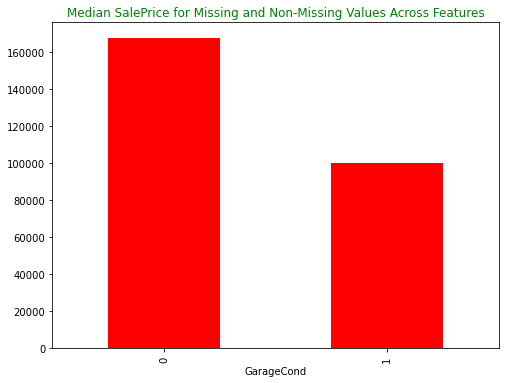

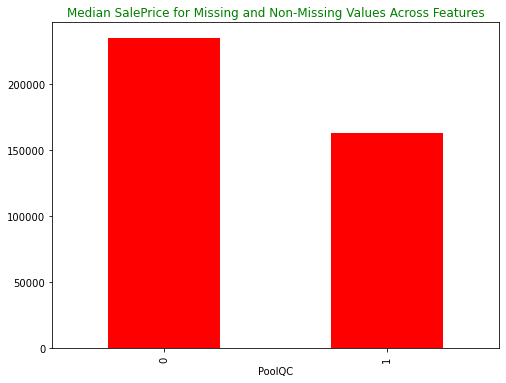

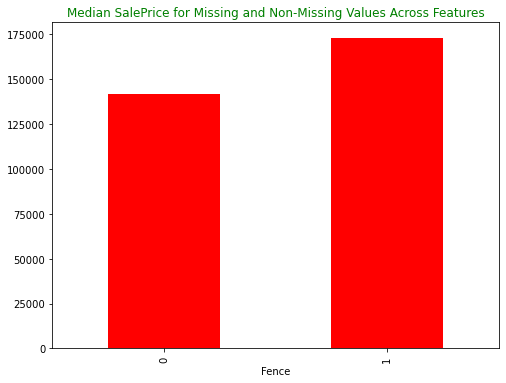

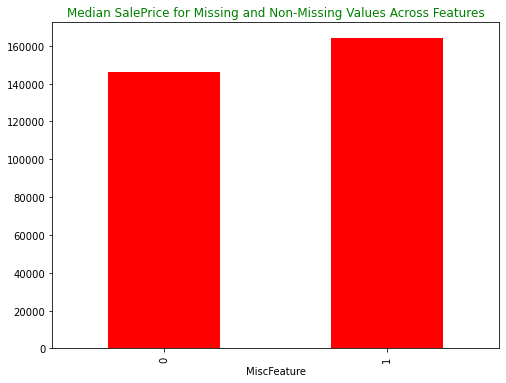

In [12]:
df1=df.copy()

for feature in features_with_na:
    #changing the missing value to 1 and non missing to 0
    df1[feature] = np.where(df1[feature].isnull(),1,0)
    
    # Let calculate the mewdian saleprice where the information is missing or present
    
    df1.groupby(feature)['SalePrice'].median().plot(kind='bar',figsize=(8,6),color='r')
    plt.title("Median SalePrice for Missing and Non-Missing Values Across Features",color='g')
    plt.show()

In [13]:
df1 = df.copy()

median_saleprice = pd.DataFrame()                                    #Created an empty dataframe

for feature in features_with_na:
    df1[feature] = np.where(df1[feature].isnull(), 1, 0)             #changing the missing value to 1 and non missing to 0
    
    median_values = df1.groupby(feature)['SalePrice'].median()       #feature wise median SalePrice
    median_saleprice[feature] = median_values                        #stores the median SalePrice values, it adds a new column 
# named after the feature to the median_saleprice DataFrame. It'll contain the median SalePrice for missing & non-missing for that feature.

median_saleprice = median_saleprice.transpose()


In [14]:
median_saleprice

LotFrontage,0,1
LotFrontage,159500.0,172400.0
Alley,140000.0,165000.0
MasVnrType,162700.0,203287.0
MasVnrArea,162700.0,203287.0
BsmtQual,165000.0,101800.0
BsmtCond,165000.0,101800.0
BsmtExposure,165000.0,104025.0
BsmtFinType1,165000.0,101800.0
BsmtFinType2,165000.0,104025.0
Electrical,163000.0,167500.0


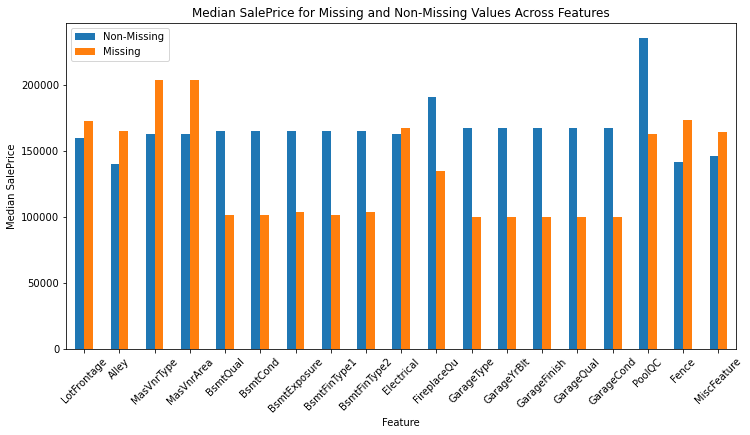

In [15]:
# Plot the results
median_saleprice.plot(kind='bar', figsize=(12, 6))
plt.title('Median SalePrice for Missing and Non-Missing Values Across Features')
plt.ylabel('Median SalePrice')
plt.xlabel('Feature')
plt.xticks(rotation=45)
plt.legend(['Non-Missing','Missing'])    # 1=missing & 0=non-missing
plt.show()

## numerical variable

In [16]:
## All the numeric variable

numeric_features=[feature for feature in df.columns if df[feature].dtype!='O']
numeric_features

# used df the original datset, coz in copied df1, i have already converted many nan into 1 & 0 

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [17]:
print(len(numeric_features))

38


In [18]:
df[numeric_features].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [19]:
## Date-Time Variable.

In [20]:
list(numeric_features)

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [21]:
Date_time_feature=[feature for feature in numeric_features if 'Yr' in feature or 'Year' in feature]
Date_time_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [22]:
df[Date_time_feature].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008


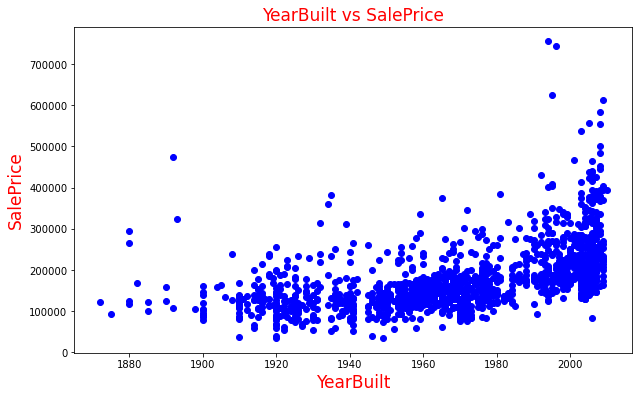

In [23]:
## will check how the Year of built and year of sold affects SalePrice.....

plt.figure(figsize=(10,6))

plt.scatter(df['YearBuilt'],df['SalePrice'],color='blue')

plt.xlabel('YearBuilt', fontsize=17, color='r')
plt.ylabel('SalePrice', fontsize=17, color='r')
plt.title('YearBuilt vs SalePrice', fontsize=17,color='r')
plt.show()


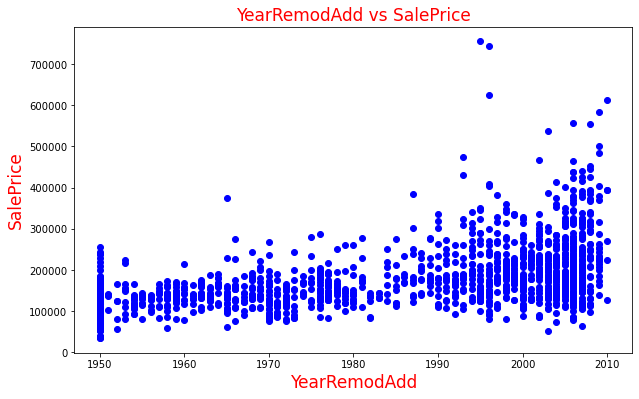

In [24]:
plt.figure(figsize=(10,6))

plt.scatter(df['YearRemodAdd'],df['SalePrice'],color='blue')

plt.xlabel('YearRemodAdd', fontsize=17, color='r')
plt.ylabel('SalePrice', fontsize=17, color='r')
plt.title('YearRemodAdd vs SalePrice', fontsize=17,color='r')
plt.show()

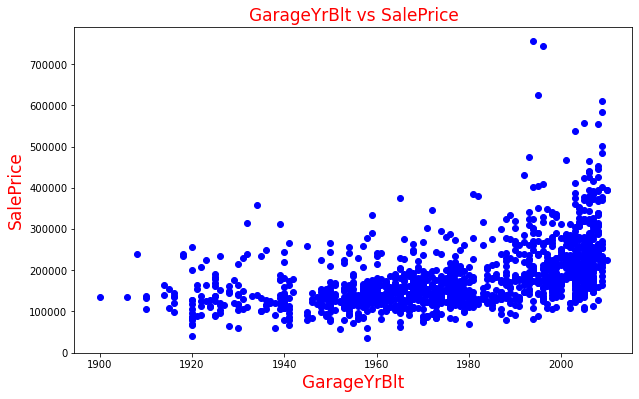

In [25]:
plt.figure(figsize=(10,6))

plt.scatter(df['GarageYrBlt'],df['SalePrice'],color='blue')

plt.xlabel('GarageYrBlt', fontsize=17, color='r')
plt.ylabel('SalePrice', fontsize=17, color='r')
plt.title('GarageYrBlt vs SalePrice', fontsize=17,color='r')
plt.show()

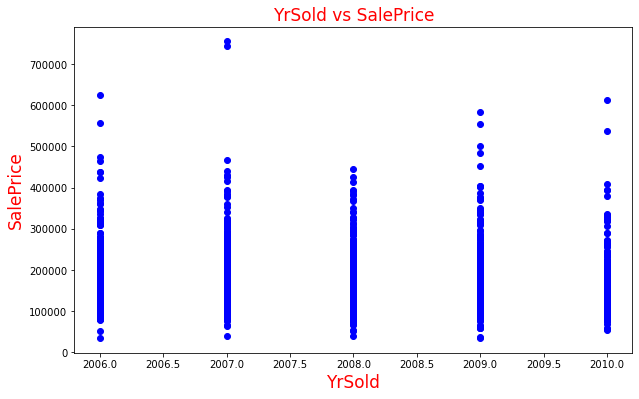

In [26]:
plt.figure(figsize=(10,6))

plt.scatter(df['YrSold'],df['SalePrice'],color='blue')

plt.xlabel('YrSold', fontsize=17, color='r')
plt.ylabel('SalePrice', fontsize=17, color='r')
plt.title('YrSold vs SalePrice', fontsize=17,color='r')
plt.show()

In [27]:
for year in Date_time_feature:
    print(year,':', df[year].unique())

YearBuilt : [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd : [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt : [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962.

In [28]:
## Calcute Age of the house

age_of_house=(df['YrSold']-df['YearBuilt'])*365
print(age_of_house,"days")

0        1825
1       11315
2        2555
3       33215
4        2920
        ...  
1455     2920
1456    11680
1457    25185
1458    21900
1459    15695
Length: 1460, dtype: int64 days


In [29]:
age_of_house = (df['YrSold'] - df['YearBuilt']) * 365
for age in age_of_house:
    print(f"{age} days")



1825 days
11315 days
2555 days
33215 days
2920 days
5840 days
1095 days
13140 days
28105 days
25185 days
15695 days
365 days
16790 days
365 days
17520 days
28470 days
14600 days
14235 days
1460 days
18615 days
365 days
28105 days
2190 days
11315 days
15330 days
730 days
21535 days
1095 days
17885 days
29565 days
32120 days
15330 days
365 days
18615 days
730 days
730 days
5475 days
20075 days
20805 days
19345 days
14965 days
17520 days
8760 days
12045 days
17155 days
1825 days
2190 days
365 days
32485 days
14965 days
3650 days
26280 days
17155 days
9125 days
18980 days
16060 days
3650 days
730 days
0 days
13140 days
730 days
31755 days
365 days
32485 days
4380 days
1095 days
14600 days
1460 days
23725 days
19345 days
12410 days
9125 days
4015 days
20440 days
34675 days
13140 days
18980 days
21900 days
15330 days
36135 days
14965 days
2920 days
365 days
17155 days
5110 days
5475 days
1460 days
0 days
34310 days
4745 days
20440 days
16425 days
32120 days
35405 days
3650 days
5840 days
255

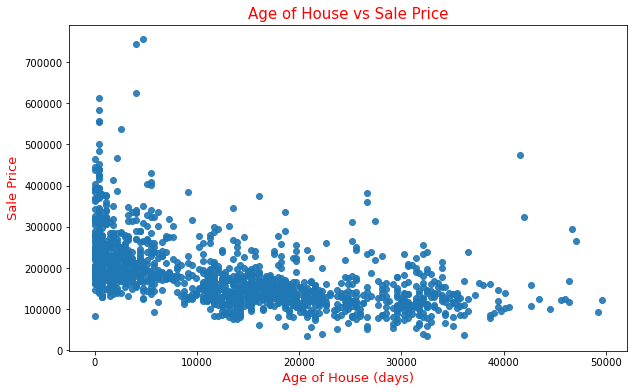

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(age_of_house, df['SalePrice'], alpha=0.9)

# Add titles and labels
plt.title('Age of House vs Sale Price',fontsize=15,color='red')
plt.xlabel('Age of House (days)',fontsize=13,color='red')
plt.ylabel('Sale Price',fontsize=13,color='red')
plt.show()

In [31]:
## Age of renovated house vs SalePrice

In [32]:
age_of_reno_house = (df['YrSold'] - df['YearRemodAdd']) * 365
for age in age_of_reno_house:
    print(f"{age} days")


1825 days
11315 days
2190 days
13140 days
2920 days
5110 days
730 days
13140 days
21170 days
21170 days
15695 days
0 days
16790 days
0 days
17520 days
2190 days
14600 days
14235 days
1460 days
16060 days
0 days
20805 days
2190 days
11315 days
3285 days
730 days
3650 days
730 days
3285 days
21170 days
21170 days
730 days
365 days
18615 days
730 days
365 days
5110 days
6935 days
1095 days
19345 days
14965 days
17520 days
8760 days
10220 days
17155 days
1825 days
2190 days
365 days
365 days
14965 days
3650 days
20440 days
17155 days
6935 days
18980 days
16060 days
3285 days
730 days
0 days
13140 days
730 days
4015 days
365 days
21900 days
4015 days
730 days
7665 days
1460 days
21900 days
19345 days
12410 days
365 days
4015 days
2555 days
21900 days
13140 days
18980 days
2555 days
15330 days
10220 days
14965 days
2920 days
365 days
17155 days
4745 days
5110 days
1460 days
0 days
9855 days
4380 days
20440 days
16425 days
1095 days
3285 days
3650 days
5840 days
2555 days
15330 days
21900 day

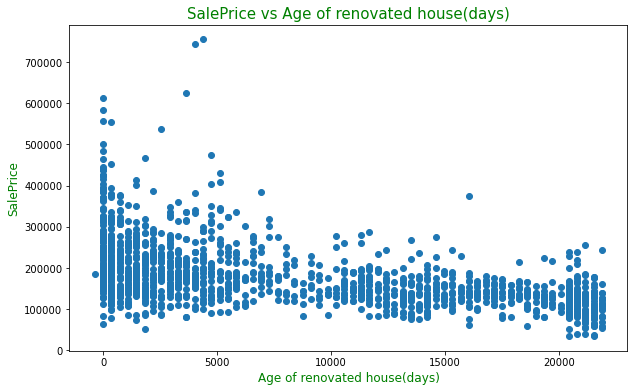

In [33]:
plt.figure(figsize=(10,6))
plt.scatter(age_of_reno_house,df['SalePrice'])
plt.xlabel('Age of renovated house(days)',fontsize=12,color='g')
plt.ylabel('SalePrice',fontsize=12,color='g')
plt.title('SalePrice vs Age of renovated house(days)',fontsize=15,color='g')
plt.show()


In [34]:
## study of Age of garrage vs SalePrice

In [35]:
age_of_garage = (df['YrSold'] - df['GarageYrBlt']) * 365
for age in age_of_garage:
    print(f"{age} days")
    

1825.0 days
11315.0 days
2555.0 days
2920.0 days
2920.0 days
5840.0 days
1095.0 days
13140.0 days
28105.0 days
25185.0 days
15695.0 days
365.0 days
16790.0 days
365.0 days
17520.0 days
5840.0 days
14600.0 days
14235.0 days
1460.0 days
18615.0 days
365.0 days
28105.0 days
2190.0 days
11315.0 days
15330.0 days
730.0 days
1825.0 days
730.0 days
17885.0 days
32120.0 days
32120.0 days
15330.0 days
365.0 days
18615.0 days
730.0 days
730.0 days
5110.0 days
20075.0 days
20805.0 days
nan days
14965.0 days
17520.0 days
8760.0 days
11315.0 days
17155.0 days
1825.0 days
2190.0 days
365.0 days
nan days
14965.0 days
3650.0 days
7665.0 days
17155.0 days
9125.0 days
16425.0 days
16060.0 days
3650.0 days
730.0 days
0.0 days
12775.0 days
0.0 days
26280.0 days
365.0 days
7300.0 days
4015.0 days
1095.0 days
14600.0 days
1460.0 days
23725.0 days
19345.0 days
12410.0 days
7300.0 days
4015.0 days
7665.0 days
34675.0 days
13140.0 days
18980.0 days
21900.0 days
nan days
15695.0 days
14965.0 days
2920.0 days
36

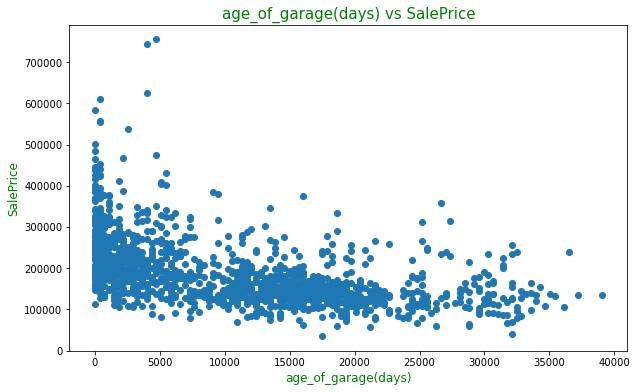

In [36]:
plt.figure(figsize=(10,6))
plt.scatter(age_of_garage,df['SalePrice'])
plt.xlabel('age_of_garage(days)',fontsize=12,color='g')
plt.ylabel('SalePrice',fontsize=12,color='g')
plt.title('age_of_garage(days) vs SalePrice',fontsize=15,color='g')
plt.show()

In [37]:
## Extract Discrete and continuous variable..

In [38]:
discrete_feature= [feature for feature in df.columns if df[feature].dtype=='int64']
discrete_feature

['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [39]:
len(discrete_feature)

35

In [40]:
df[discrete_feature].head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


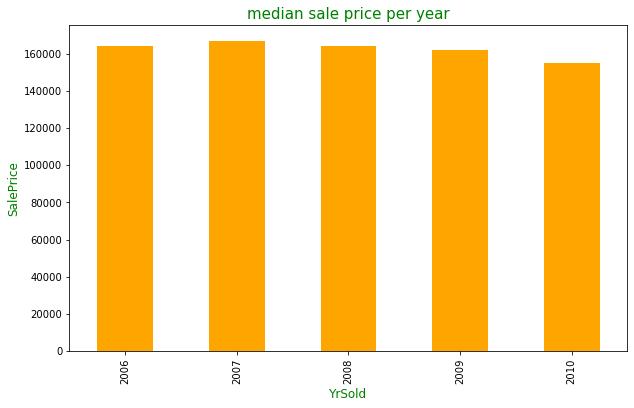

In [41]:
# I want to check the median value of SalePrice in the year of sale
# we use groupby() for aggegation function... hence, to calculate med,

plt.figure(figsize=(10,6))
df.groupby('YrSold')['SalePrice'].median().plot.bar(color='orange')
plt.xlabel('YrSold',fontsize=12,color='g')
plt.ylabel('SalePrice',fontsize=12,color='g')
plt.title('median sale price per year',color='g',fontsize=15)
plt.show()

In [42]:
# Continuous feature

continuous_feature= [feature for feature in df.columns if df[feature].dtype=='float64']
continuous_feature

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [43]:
df[continuous_feature].head()

,LotFrontage,MasVnrArea,GarageYrBlt
0,65.0,196.0,2003.0
1,80.0,0.0,1976.0
2,68.0,162.0,2001.0
3,60.0,0.0,1998.0
4,84.0,350.0,2000.0


## Correlation

In [44]:
#categoric_feature=[feature for feature in df.columns if df[feature].dtype=='O']
#categoric_feature

In [45]:
# correlation calculations requires only numerical data.

In [46]:
df[numeric_features].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [47]:
## we should slice this df[numeric_feature] into 3-4 segment coz, it has large no of features..
## here we need to pay attention. need to add "saleprice" in each segment..

In [48]:
ind_num_feature_=df[numeric_features].drop(['SalePrice'],axis=1)
target=df[numeric_features]['SalePrice']

In [49]:
# dataset with 1st 10 columns

ind_num_feature_1=ind_num_feature_.iloc[:,:10]

ind_num_feature_1['SalePrice']=target     # added the 'SalePrice' column to ind_num_feature_1 by direct assignment.

In [50]:
ind_num_feature_1.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,250000


In [51]:
ind_num_feature_1.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,0.386420


In [52]:
#2nd segment of data with next 10 columns

ind_num_feature_2=ind_num_feature_.iloc[:,10:20]

ind_num_feature_2['SalePrice']=target 
ind_num_feature_2.head()

,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,SalePrice
0,0,150,856,856,854,0,1710,1,0,2,208500
1,0,284,1262,1262,0,0,1262,0,1,2,181500
2,0,434,920,920,866,0,1786,1,0,2,223500
3,0,540,756,961,756,0,1717,1,0,1,140000
4,0,490,1145,1145,1053,0,2198,1,0,2,250000


In [53]:
ind_num_feature_2.corr()

,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,SalePrice
BsmtFinSF2,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.011378
BsmtUnfSF,-0.209294,1.000000,0.415360,0.317987,0.004469,0.028167,0.240257,-0.422900,-0.095804,0.288886,0.214479
TotalBsmtSF,0.104810,0.415360,1.000000,0.819530,-0.174512,-0.033245,0.454868,0.307351,-0.000315,0.323722,0.613581
1stFlrSF,0.097117,0.317987,0.819530,1.000000,-0.202646,-0.014241,0.566024,0.244671,0.001956,0.380637,0.605852
2ndFlrSF,-0.099260,0.004469,-0.174512,-0.202646,1.000000,0.063353,0.687501,-0.169494,-0.023855,0.421378,0.319334
LowQualFinSF,0.014807,0.028167,-0.033245,-0.014241,0.063353,1.000000,0.134683,-0.047143,-0.005842,-0.000710,-0.025606
GrLivArea,-0.009640,0.240257,0.454868,0.566024,0.687501,0.134683,1.000000,0.034836,-0.018918,0.630012,0.708624
BsmtFullBath,0.158678,-0.422900,0.307351,0.244671,-0.169494,-0.047143,0.034836,1.000000,-0.147871,-0.064512,0.227122
BsmtHalfBath,0.070948,-0.095804,-0.000315,0.001956,-0.023855,-0.005842,-0.018918,-0.147871,1.000000,-0.054536,-0.016844
FullBath,-0.076444,0.288886,0.323722,0.380637,0.421378,-0.000710,0.630012,-0.064512,-0.054536,1.000000,0.560664


In [54]:
#3rd segment of data with next 10 columns

ind_num_feature_3=ind_num_feature_.iloc[:,20:30]

ind_num_feature_3['SalePrice']=target 
ind_num_feature_3.head()

,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,1,3,1,8,0,2003.0,2,548,0,61,208500
1,0,3,1,6,1,1976.0,2,460,298,0,181500
2,1,3,1,6,1,2001.0,2,608,0,42,223500
3,0,3,1,7,1,1998.0,3,642,0,35,140000
4,1,4,1,9,1,2000.0,3,836,192,84,250000


In [55]:
ind_num_feature_3.corr()

,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
HalfBath,1.000000,0.226651,-0.068263,0.343415,0.203649,0.196785,0.219178,0.163549,0.108080,0.199740,0.284108
BedroomAbvGr,0.226651,1.000000,0.198597,0.676620,0.107570,-0.064518,0.086106,0.065253,0.046854,0.093810,0.168213
KitchenAbvGr,-0.068263,0.198597,1.000000,0.256045,-0.123936,-0.124411,-0.050634,-0.064433,-0.090130,-0.070091,-0.135907
TotRmsAbvGrd,0.343415,0.676620,0.256045,1.000000,0.326114,0.148112,0.362289,0.337822,0.165984,0.234192,0.533723
Fireplaces,0.203649,0.107570,-0.123936,0.326114,1.000000,0.046822,0.300789,0.269141,0.200019,0.169405,0.466929
GarageYrBlt,0.196785,-0.064518,-0.124411,0.148112,0.046822,1.000000,0.588920,0.564567,0.224577,0.228425,0.486362
GarageCars,0.219178,0.086106,-0.050634,0.362289,0.300789,0.588920,1.000000,0.882475,0.226342,0.213569,0.640409
GarageArea,0.163549,0.065253,-0.064433,0.337822,0.269141,0.564567,0.882475,1.000000,0.224666,0.241435,0.623431
WoodDeckSF,0.108080,0.046854,-0.090130,0.165984,0.200019,0.224577,0.226342,0.224666,1.000000,0.058661,0.324413
OpenPorchSF,0.199740,0.093810,-0.070091,0.234192,0.169405,0.228425,0.213569,0.241435,0.058661,1.000000,0.315856


In [56]:
#4rd segment of data with next 10 columns

ind_num_feature_4=ind_num_feature_.iloc[:,30:]

ind_num_feature_4['SalePrice']=target 
ind_num_feature_4.head()

,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0,0,0,0,0,2,2008,208500
1,0,0,0,0,0,5,2007,181500
2,0,0,0,0,0,9,2008,223500
3,272,0,0,0,0,2,2006,140000
4,0,0,0,0,0,12,2008,250000


In [57]:
ind_num_feature_4.corr()

,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
EnclosedPorch,1.000000,-0.037305,-0.082864,0.054203,0.018361,-0.028887,-0.009916,-0.128578
3SsnPorch,-0.037305,1.000000,-0.031436,-0.007992,0.000354,0.029474,0.018645,0.044584
ScreenPorch,-0.082864,-0.031436,1.000000,0.051307,0.031946,0.023217,0.010694,0.111447
PoolArea,0.054203,-0.007992,0.051307,1.000000,0.029669,-0.033737,-0.059689,0.092404
MiscVal,0.018361,0.000354,0.031946,0.029669,1.000000,-0.006495,0.004906,-0.021190
MoSold,-0.028887,0.029474,0.023217,-0.033737,-0.006495,1.000000,-0.145721,0.046432
YrSold,-0.009916,0.018645,0.010694,-0.059689,0.004906,-0.145721,1.000000,-0.028923
SalePrice,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923,1.000000


In [58]:
## Analyze target variable/'SalePrice'

In [59]:
df['SalePrice'].median()

163000.0

In [60]:
df['SalePrice'].std()

79442.50288288663

## Outlier

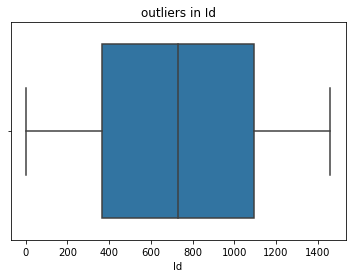

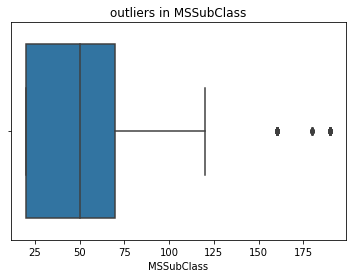

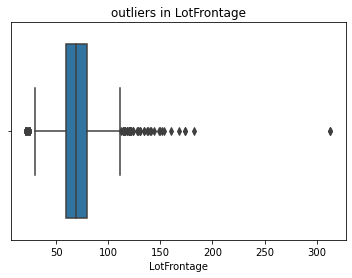

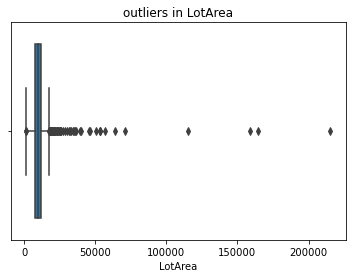

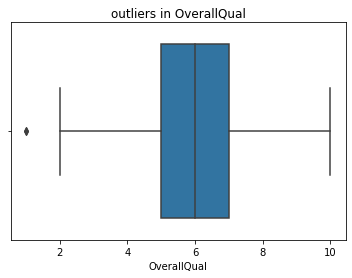

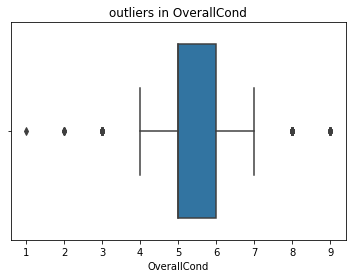

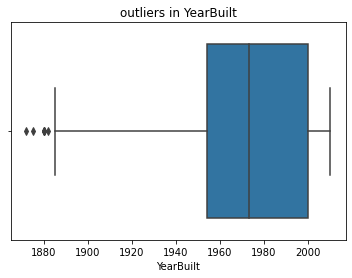

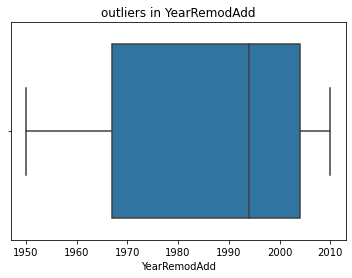

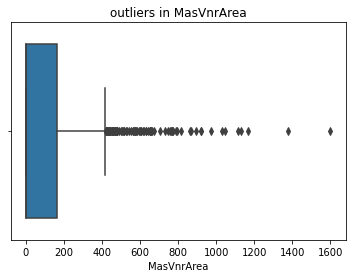

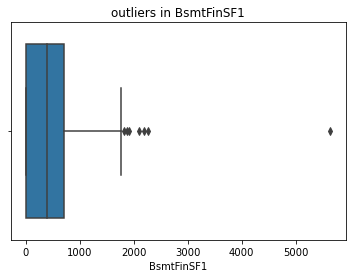

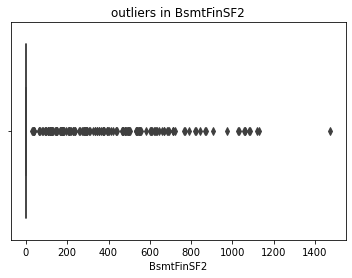

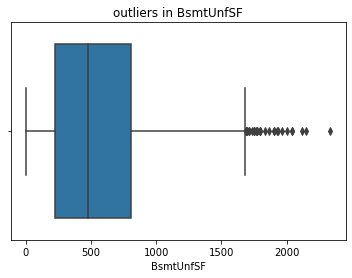

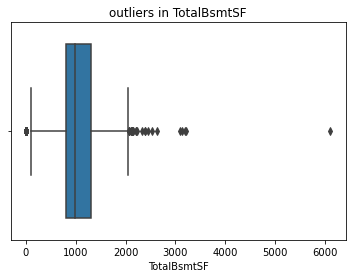

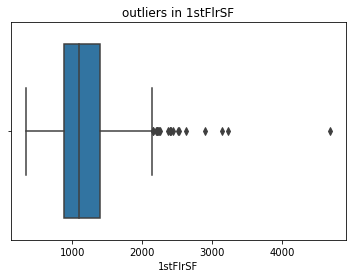

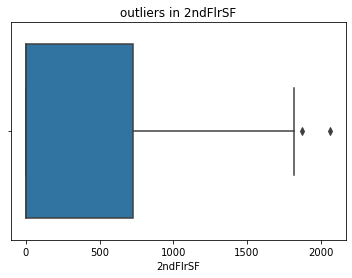

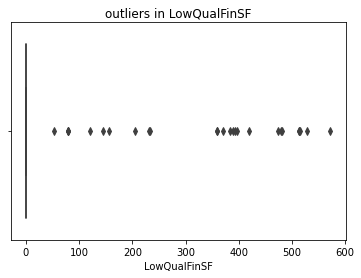

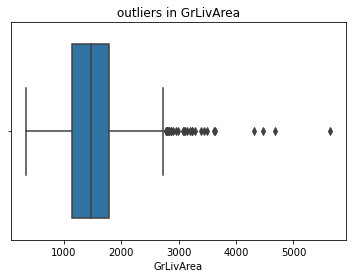

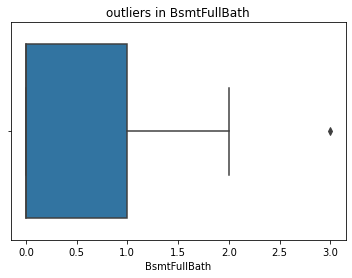

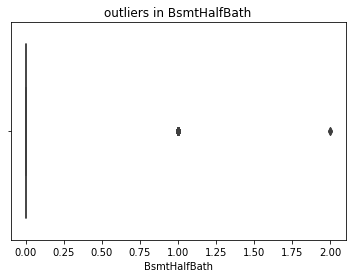

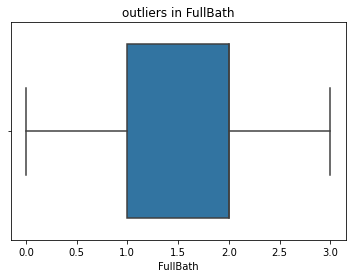

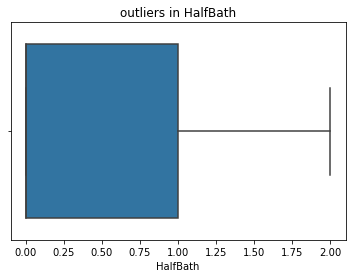

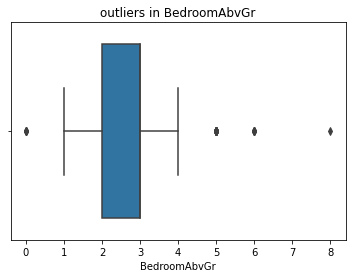

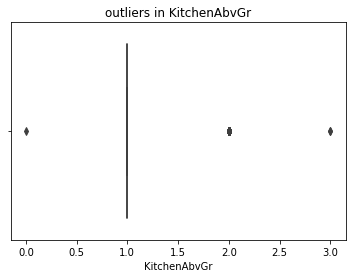

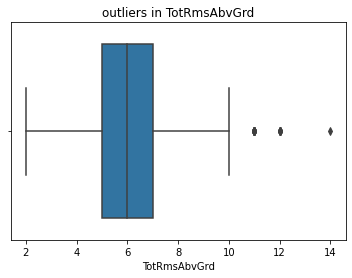

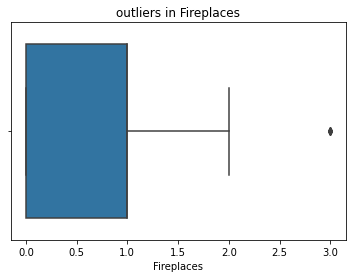

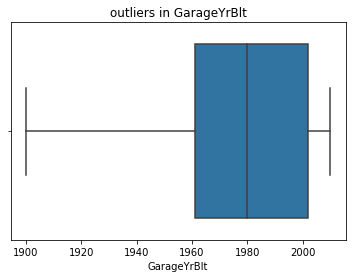

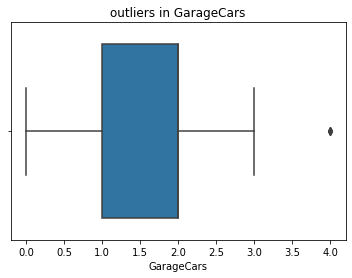

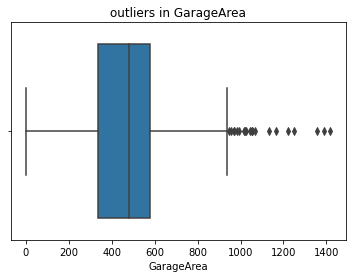

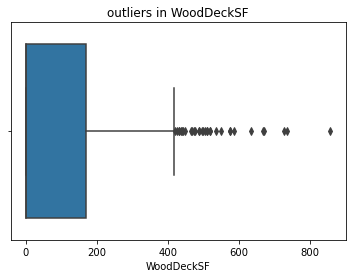

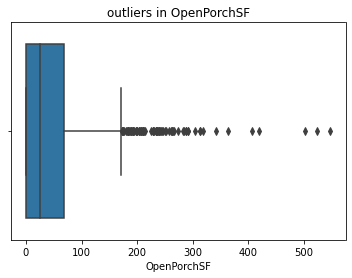

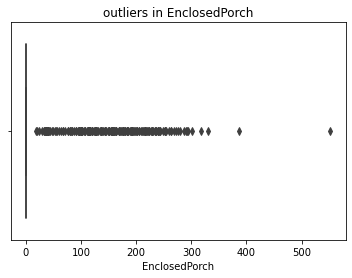

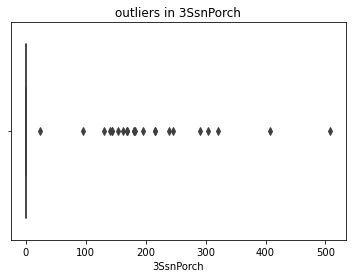

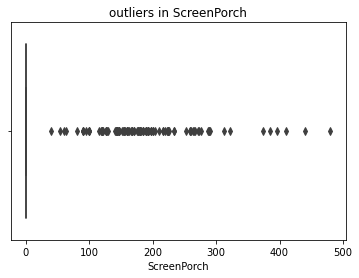

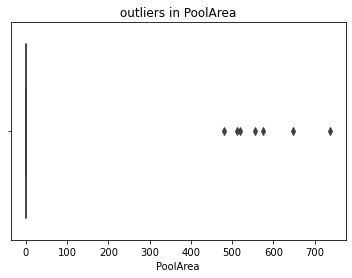

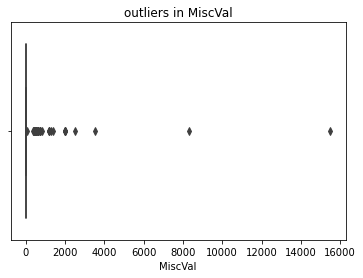

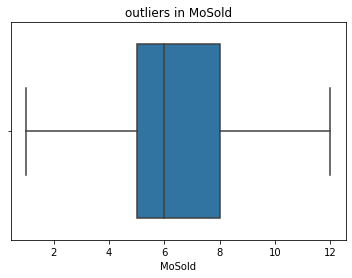

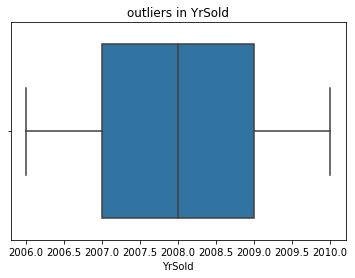

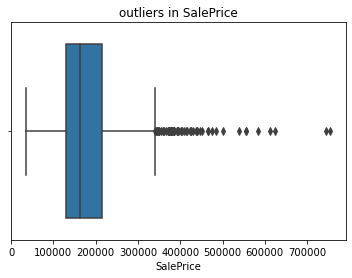

In [61]:
for feature in numeric_features:
    sns.boxplot(df[feature])
    plt.title('outliers in' + ' ' + feature)
    plt.show()

## Handle outliers in Features

In [62]:
# Using log-normal transformation

In [63]:
# Trget variable = SalePrice

In [64]:
df['SalePrice'].median()

163000.0

In [65]:
df['SalePrice'].std()

79442.50288288663

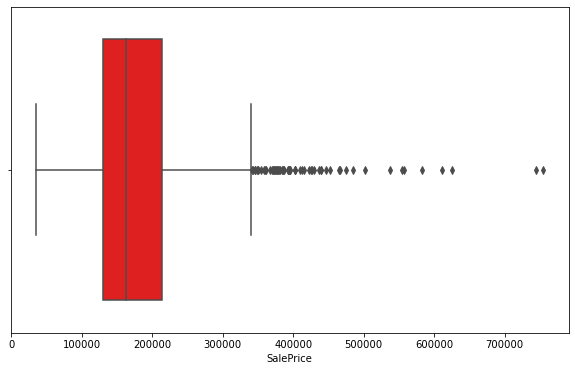

In [66]:
plt.figure(figsize=(10,6))
sns.boxplot(df['SalePrice'],color='red')
plt.show()

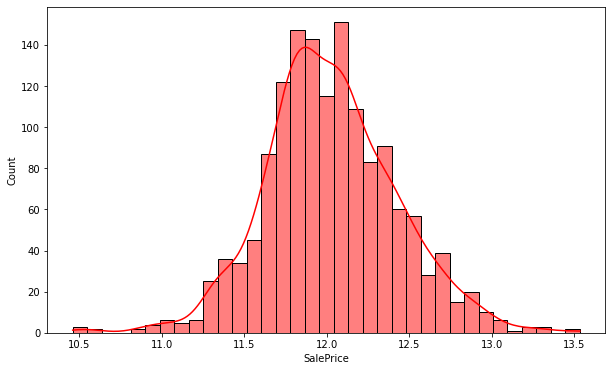

In [67]:
plt.figure(figsize=(10,6))
sns.histplot(np.log(df1['SalePrice']),kde=True,color='red')
plt.show()
